In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> h

Commands:
  d) Download a package or collection     u) Update out of date packages
  l) List packages & collections          h) Help
  c) View & Modify Configuration          q) Quit

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



In [ ]:
imdb_data=pd.read_csv('Test.csv')
print(imdb_data.shape)
imdb_data.head(10)

(5000, 2)


,text,label
0,I always wrote this series off as being a comp...,0
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,0
2,This movie was so poorly written and directed ...,0
3,The most interesting thing about Miryang (Secr...,1
4,"when i first read about ""berlin am meer"" i did...",0
5,"I saw this film on September 1st, 2005 in Indi...",1
6,I saw a screening of this movie last night. I ...,0
7,William Hurt may not be an American matinee id...,1
8,IT IS A PIECE OF CRAP! not funny at all. durin...,0
9,I'M BOUT IT(1997)<br /><br />Developed & publi...,0


In [ ]:
imdb_data['label'].value_counts()


,count
label,
1,2505
0,2495


Splitting the dataset into a training set and a valuation set

In [45]:
from sklearn.model_selection import train_test_split

train_text, test_text, train_label, test_label = train_test_split(
    imdb_data['text'], imdb_data['label'], test_size=0.2, random_state=42)


tokenization of text to split the words

In [ ]:

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(denoise_text)

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(remove_special_characters)

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(simple_stemmer)

In [ ]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
#Apply function on review column
imdb_data['text']=imdb_data['text'].apply(remove_stopwords)

{'a', 're', 'myself', 'she', 'into', 'during', 'don', "weren't", "you'll", 'hers', "we've", 'your', 'about', 'up', 'ma', 'having', "mustn't", "i'd", 'didn', 'once', 'some', 'the', 'being', 'very', "won't", 'its', 'against', 'he', 'and', 'for', 'have', 'by', 'yours', "don't", 'me', 'down', 'more', 'over', 'are', 'but', 'hadn', "they'll", "he's", "should've", 'isn', 'so', 't', 'same', "we're", 'with', 'to', 'herself', 'under', "hadn't", 'here', "they've", 'y', 'as', "that'll", "i'll", "doesn't", 'both', "hasn't", 'has', 'ourselves', 'you', 'other', 'wouldn', 'before', 'be', 'should', 'yourselves', 'his', 'each', "you'd", 'o', 'couldn', 'further', 'how', 'at', "mightn't", 'or', 'doing', 'ain', 'above', 'can', "needn't", "aren't", 'of', 'mightn', 'this', 'no', 'too', "haven't", "wouldn't", 'm', 'most', 'theirs', 'weren', "he'll", 'any', 'whom', 'when', 'again', 'not', 'then', 'why', 'all', 'was', 'll', 'do', 'because', "couldn't", 'which', 'won', 'they', "we'll", 'until', 'will', 'aren', '

In [ ]:
#normalized train reviews
norm_train_text=imdb_data.text[:40000]
norm_train_text[0]
#convert dataframe to string
#norm_train_string=norm_train_text.to_string()
#Spelling correction using Textblob
#norm_train_spelling=TextBlob(norm_train_string)
#norm_train_spelling.correct()
#Tokenization using Textblob
#norm_train_words=norm_train_spelling.words
#norm_train_words

'want watch thi movi becau eliza dushku onli ha smaller part charact isnt veri likabl howev main charact play melissa sagemil extrem beauti perfect delight look throughout movi thi realli noth showca look talent doe veri good jobth stori face pretti nonsen car crash friend possibl dead keep live previou live sort mysteri thing happen bad guy never realli find possibl one car certainli dont hear anyth whi final scene especi seem filmic ambiti cant get anyth coher open scene bad guy wear strang mask cut blond girl wrist gather blood never explain follow unless bad guy suppo repres surgeon whore tri pull cassi sagemil back dead doesnt seem work bad guy bad guy realli mess stori might otherwi interest supernatur stori death love sacrif hell need bad guys3 10'

In [ ]:
#Normalized test reviews
norm_test_text=imdb_data.text[4000:]
norm_test_text[4000]
##convert dataframe to string
#norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
#norm_test_spelling=TextBlob(norm_test_string)
#print(norm_test_spelling.correct())
#Tokenization using Textblob
#norm_test_words=norm_test_spelling.words
#norm_test_words


'blood legaci start arriv lawyer tom drake norman bartold dean estat formerli decea christoph dean john carradin upon hi arriv greet mr dean four children gregori jeff morrow hi wife laura merri ander victoria faith domergu johnni richard davalo plu lesli brook mill fella carl isenberg john smith drake play tape record theyr late father wish hi death estat worth 136 million dollar split equal hi four children ani die money would split equal rest die freaki servant elga ivi bethun igor buck kartalian mundan name frank john russel would pocket lot well satisfi quarter share 136 million still almost 35 million back 1971 doesnt sound bad someon decid want themselv long befor decapit head turn fridgecowritten produc direct roy monson blood legaci disappoint two account starter thi film altern much common titl legaci blood also titl obscur horror film direct andi milliagn back 78 ive alway want see film regularli mix similar stori check screen cabl tv guid legaci blood wa excit becau said wa

In [46]:
cv = CountVectorizer()
cv_train_text = cv.fit_transform(train_text)
cv_test_text = cv.transform(test_text)


In [47]:
tv = TfidfVectorizer()
tv_train_text = tv.fit_transform(train_text)
tv_test_text = tv.transform(test_text)


In [48]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
label_data=lb.fit_transform(imdb_data['label'])
print(label_data.shape)

(5000, 1)


In [49]:
#Spliting the sentiment data
train_label=label_data[:4000]
test_label=label_data[4000:]
print(train_label)
print(test_label)


[[0]
 [1]
 [0]
 ...
 [1]
 [0]
 [1]]
[[0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]

In [50]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_text,train_label)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_text,train_label)
print(lr_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, max_iter=500, random_state=42)


In [51]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_text)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_text)
print(lr_tfidf_predict)

[0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1
 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1
 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1
 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0
 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1
 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 1 0 1 1 0 1 0 

In [52]:
#Classification report for bag of words
lr_bow_report=classification_report(test_label,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_label,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.50      0.59      0.54       504
    Negative       0.49      0.40      0.44       496

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000

              precision    recall  f1-score   support

    Positive       0.50      0.50      0.50       504
    Negative       0.49      0.50      0.50       496

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.50      0.50      0.50      1000



<function matplotlib.pyplot.show(close=None, block=None)>

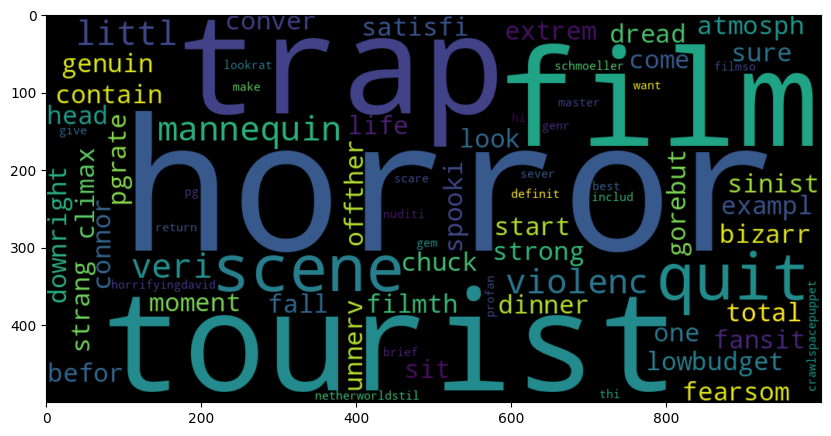

In [53]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_text[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

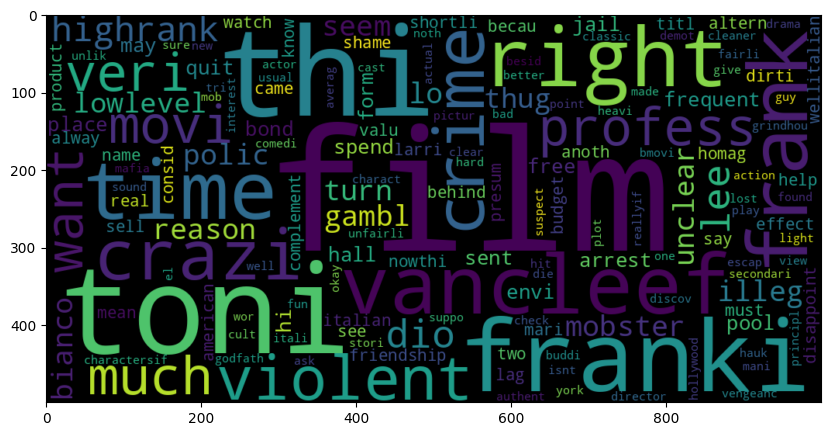

In [54]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_text[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show